In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
xls = pd.ExcelFile('C:/Users/kk/Downloads/Myntra dataset.xlsx')

In [7]:
df_products = xls.parse("dim_products")
df_customers = xls.parse("dim_customers")
df_orders = xls.parse("fact_orders")

In [8]:
print(df_products.head())
print(df_customers.head())
print(df_orders.head())

  Product ID Category Sub-category Product Name Brand Name Size  Color  \
0      P0001    Women      Topwear     T-Shirts   Roadster   40  Black   
1      P0002    Women      Topwear     T-Shirts   Roadster   40   Blue   
2      P0003    Women      Topwear     T-Shirts   Roadster   42  White   
3      P0004    Women      Topwear     T-Shirts   Roadster   44  Green   
4      P0005    Women      Topwear     T-Shirts       Puma   38  Olive   

   Ratings  
0        4  
1        5  
2        3  
3        2  
4        5  
  Customer ID  Customer Age    City        State
0        C001            30  Mumbai  Maharashtra
1        C002            35  Mumbai  Maharashtra
2        C003            36  Mumbai  Maharashtra
3        C004            40    Pune  Maharashtra
4        C005            25    Pune  Maharashtra
  Order ID Customer ID Product ID       Date  Original Price  Discount%
0   OD0001        C001      P0001 2021-05-20             349       0.30
1   OD0002        C002      P0001 2021-

In [13]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB


In [14]:
df_products.isnull().sum()

Product ID      0
Category        0
Sub-category    0
Product Name    0
Brand Name      0
Size            0
Color           0
Ratings         0
dtype: int64

In [12]:
df_products.describe()


,Ratings
count,3071.000000
mean,4.002931
std,0.971411
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [16]:
df_orders['Date'] = pd.to_datetime(df_orders['Date'])

df_orders['Selling Price'] = df_orders['Original Price'] * (1 - df_orders['Discount%'])

df_orders['Year'] = df_orders['Date'].dt.year
df_orders['Month'] = df_orders['Date'].dt.month
print("Cleaning and processing data...")

Cleaning and processing data...


Analyzing sales trends...



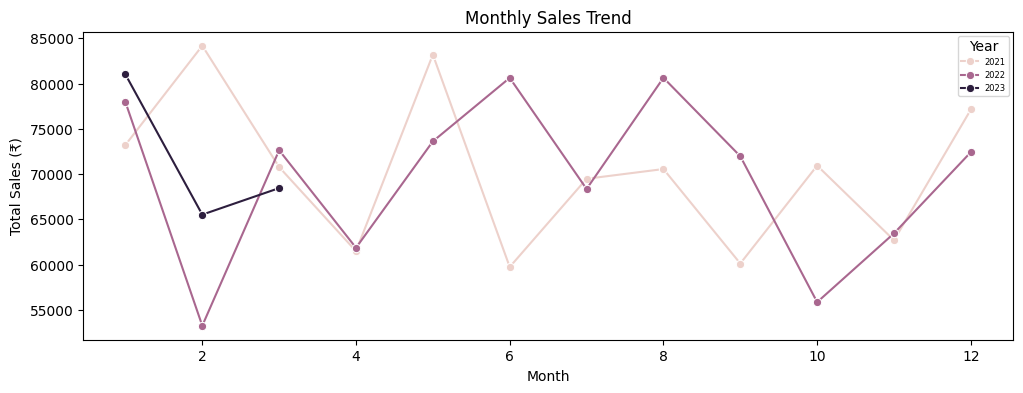

In [40]:
print("Analyzing sales trends...")

sales_trends = df_orders.groupby(['Year', 'Month'])['Selling Price'].sum().reset_index()
plt.figure(figsize=(12,4))  # Reduced size
sns.lineplot(data=sales_trends, x='Month', y='Selling Price', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.legend(title="Year", loc="upper right", fontsize=6)
print()


Analyzing customer purchasing behavior...


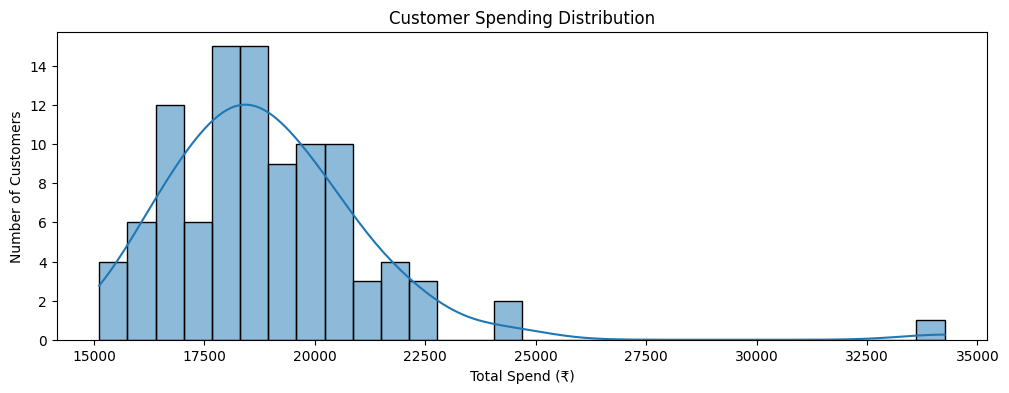

In [37]:
print("Analyzing customer purchasing behavior...")
customer_spending = df_orders.groupby('Customer ID')['Selling Price'].sum().reset_index()
plt.figure(figsize=(12, 4))
sns.histplot(customer_spending['Selling Price'], bins=30, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend (₹)")
plt.ylabel("Number of Customers")
plt.show()

Analyzing impact of discounts on sales...


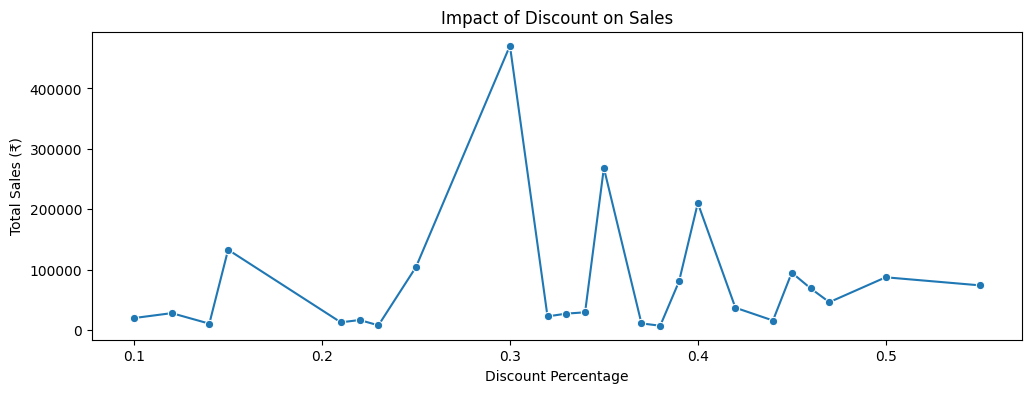

In [39]:
print("Analyzing impact of discounts on sales...")

discount_analysis = df_orders.groupby('Discount%')['Selling Price'].sum().reset_index()
plt.figure(figsize=(12, ))
sns.lineplot(data=discount_analysis, x='Discount%', y='Selling Price', marker='o')
plt.title("Impact of Discount on Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Sales (₹)")
plt.show()

Text(0.5, 1.0, 'Top 10 Highest Spending Customers')

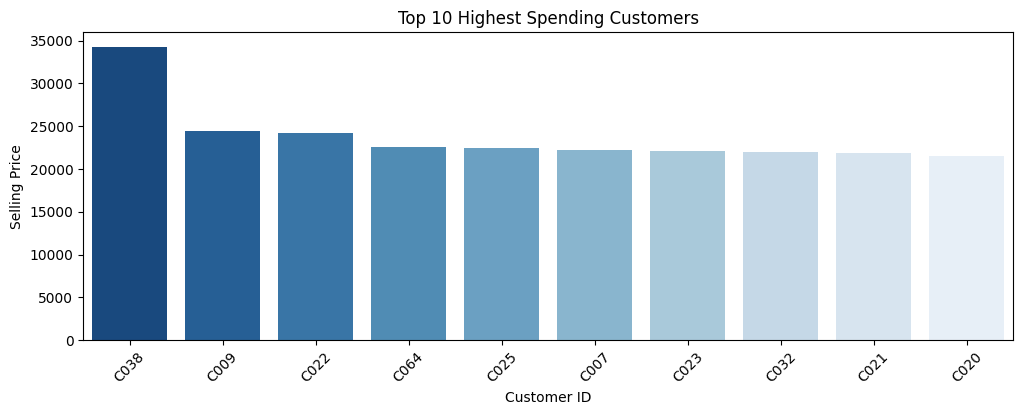

In [61]:
# Identify top spending customers
top_customers = df_orders.groupby('Customer ID')['Selling Price'].sum().reset_index()
top_customers = top_customers.sort_values(by='Selling Price', ascending=False).head(10)

plt.figure(figsize=(12,4))  
sns.barplot(
    data=top_customers, 
    x='Customer ID', 
    y='Selling Price', 
    hue='Customer ID',
    palette="Blues_r",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Top 10 Highest Spending Customers")


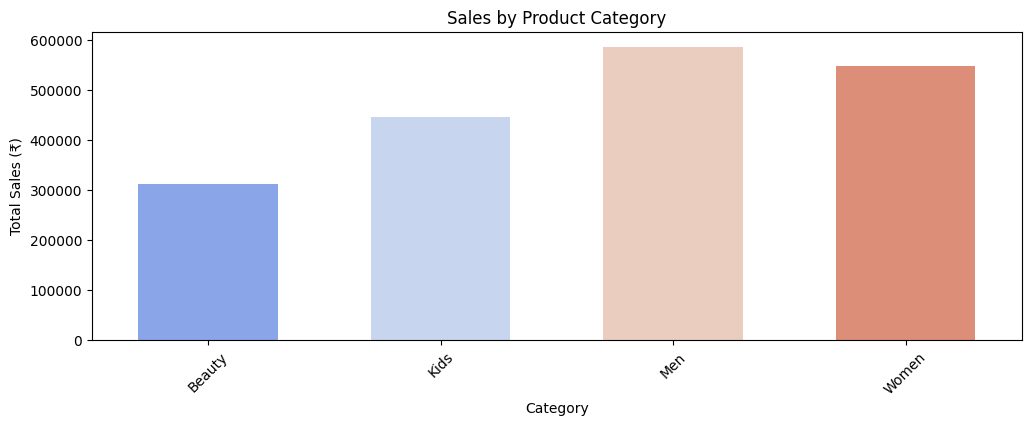

In [63]:
# Merge orders with product data to get category information
category_sales = df_orders.merge(df_products, on='Product ID')
category_sales = category_sales.groupby('Category')['Selling Price'].sum().reset_index()

plt.figure(figsize=(12, 4))  
sns.barplot(
    data=category_sales, 
    x='Category', 
    y='Selling Price', 
    hue='Category',  
    palette="coolwarm",  
    legend=False,  
    width=0.6
)
plt.xticks(rotation=45)
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (₹)")
plt.show()

